In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [3]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=afc58f1208c5ed7ff3802a8f96bf43fd


In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=250)
lngs = np.random.uniform(low=-180.000, high=180.000, size=250)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

172

In [8]:
# THIS IS ONE WAY TO WRITE THE CODE. THE NEXT CELL IS MORE CONSISCE
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    

Beginning Data Retrieval     
-----------------------------


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | qaanaaq
Processing Record 2 of Set 1 | denpasar
Processing Record 3 of Set 1 | sotnikovo
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | beringovskiy
Processing Record 6 of Set 1 | saint-joseph
Processing Record 7 of Set 1 | fortuna
Processing Record 8 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 9 of Set 1 | severo-kurilsk
Processing Record 10 of Set 1 | husavik
Processing Record 11 of Set 1 | saint george
Processing Record 12 of Set 1 | tasiilaq
Processing Record 13 of Set 1 | comodoro rivadavia
Processing Record 14 of Set 1 | lompoc
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 17 of Set 1 | nizhniy odes
Processing Record 18 of Set 1 | khatanga
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | high level
Processing Record 21 of Set 1 | palana
Pr

In [10]:
len(city_data)

156

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaanaaq,77.4840,-69.3632,-3.19,84,100,1.61,GL,2023-01-29 14:33:58
1,Denpasar,-8.6500,115.2167,78.46,94,40,8.05,ID,2023-01-29 14:36:09
2,Sotnikovo,51.8845,107.4791,8.69,78,20,0.00,RU,2023-01-29 14:38:07
3,Albany,42.6001,-73.9662,36.27,76,100,1.99,US,2023-01-29 14:26:35
4,Beringovskiy,63.0500,179.3167,23.99,95,100,9.91,RU,2023-01-29 14:38:09
5,Saint-Joseph,-21.3667,55.6167,84.58,84,100,1.70,RE,2023-01-29 14:38:10
6,Fortuna,40.5982,-124.1573,41.92,94,100,0.00,US,2023-01-29 14:38:11
7,Severo-Kurilsk,50.6789,156.1250,25.39,66,100,29.37,RU,2023-01-29 14:32:45
8,Husavik,66.0449,-17.3389,28.99,95,100,19.48,IS,2023-01-29 14:34:26
9,Saint George,37.1041,-113.5841,28.99,80,0,0.00,US,2023-01-29 14:27:59


In [12]:
new_city_data_order = ["City", "Country", "Date", "Lat","Lng","Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
new_city_df = city_data_df[new_city_data_order]
new_city_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Qaanaaq,GL,2023-01-29 14:33:58,77.4840,-69.3632,-3.19,84,100,1.61
1,Denpasar,ID,2023-01-29 14:36:09,-8.6500,115.2167,78.46,94,40,8.05
2,Sotnikovo,RU,2023-01-29 14:38:07,51.8845,107.4791,8.69,78,20,0.00
3,Albany,US,2023-01-29 14:26:35,42.6001,-73.9662,36.27,76,100,1.99
4,Beringovskiy,RU,2023-01-29 14:38:09,63.0500,179.3167,23.99,95,100,9.91
5,Saint-Joseph,RE,2023-01-29 14:38:10,-21.3667,55.6167,84.58,84,100,1.70
6,Fortuna,US,2023-01-29 14:38:11,40.5982,-124.1573,41.92,94,100,0.00
7,Severo-Kurilsk,RU,2023-01-29 14:32:45,50.6789,156.1250,25.39,66,100,29.37
8,Husavik,IS,2023-01-29 14:34:26,66.0449,-17.3389,28.99,95,100,19.48
9,Saint George,US,2023-01-29 14:27:59,37.1041,-113.5841,28.99,80,0,0.00


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

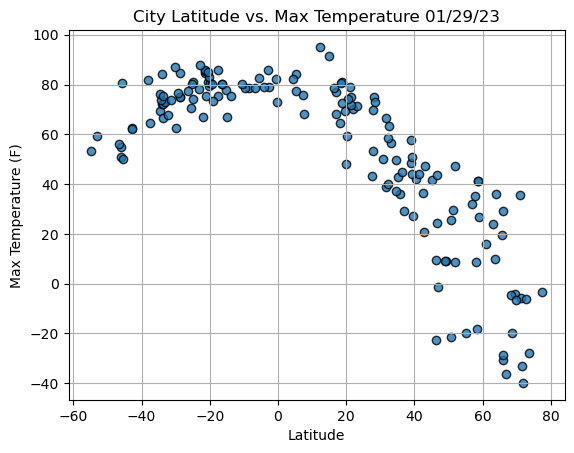

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

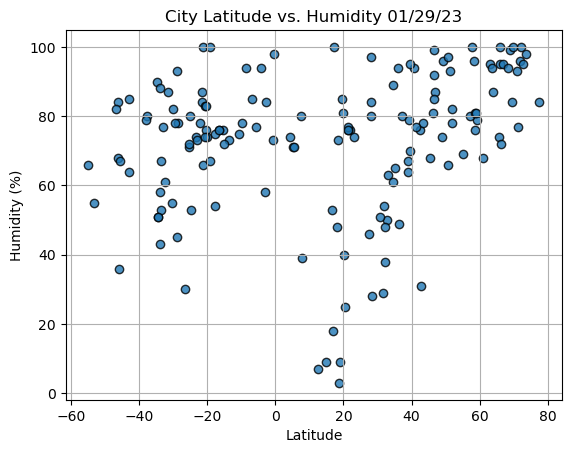

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

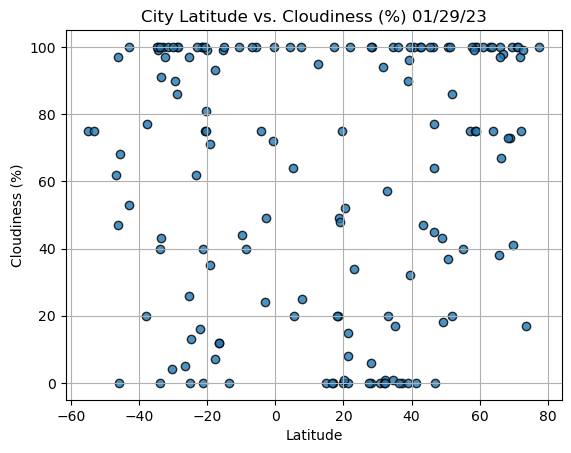

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

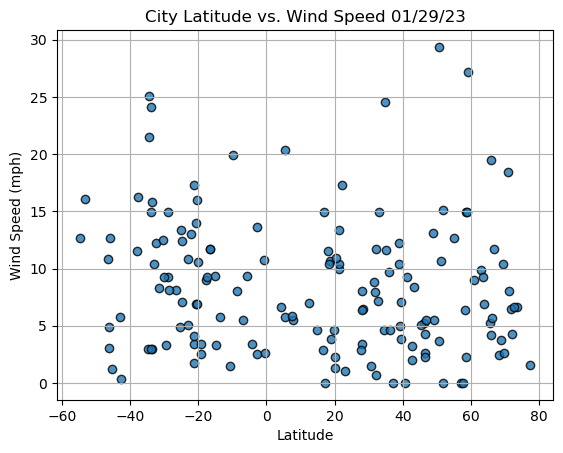

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

IndentationError: expected an indented block (755688848.py, line 3)

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaanaaq,77.4840,-69.3632,-3.19,84,100,1.61,GL,2023-01-29 14:33:58
2,Sotnikovo,51.8845,107.4791,8.69,78,20,0.00,RU,2023-01-29 14:38:07
3,Albany,42.6001,-73.9662,36.27,76,100,1.99,US,2023-01-29 14:26:35
4,Beringovskiy,63.0500,179.3167,23.99,95,100,9.91,RU,2023-01-29 14:38:09
6,Fortuna,40.5982,-124.1573,41.92,94,100,0.00,US,2023-01-29 14:38:11


In [23]:
index13 = city_data_df.loc[13]
index13

City                   Bredasdorp
Lat                      -34.5322
Lng                       20.0403
Max Temp                    69.42
Humidity                       51
Cloudiness                     99
Wind Speed                   21.5
Country                        ZA
Date          2023-01-29 14:31:00
Name: 13, dtype: object

In [24]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4       True
       ...  
151     True
152     True
153     True
154     True
155    False
Name: Lat, Length: 156, dtype: bool

In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaanaaq,77.4840,-69.3632,-3.19,84,100,1.61,GL,2023-01-29 14:33:58
2,Sotnikovo,51.8845,107.4791,8.69,78,20,0.00,RU,2023-01-29 14:38:07
3,Albany,42.6001,-73.9662,36.27,76,100,1.99,US,2023-01-29 14:26:35
4,Beringovskiy,63.0500,179.3167,23.99,95,100,9.91,RU,2023-01-29 14:38:09
6,Fortuna,40.5982,-124.1573,41.92,94,100,0.00,US,2023-01-29 14:38:11
...,...,...,...,...,...,...,...,...,...
150,Mashhad,36.2970,59.6062,44.74,49,0,4.61,IR,2023-01-29 14:42:15
151,Pevek,69.7008,170.3133,-6.50,100,41,2.59,RU,2023-01-29 14:42:16
152,Grindavik,63.8424,-22.4338,36.07,87,75,6.91,IS,2023-01-29 14:42:17
153,Jerecuaro,20.1500,-100.5167,59.43,40,1,1.28,MX,2023-01-29 14:42:19


In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaanaaq,77.4840,-69.3632,-3.19,84,100,1.61,GL,2023-01-29 14:33:58
2,Sotnikovo,51.8845,107.4791,8.69,78,20,0.00,RU,2023-01-29 14:38:07
3,Albany,42.6001,-73.9662,36.27,76,100,1.99,US,2023-01-29 14:26:35
4,Beringovskiy,63.0500,179.3167,23.99,95,100,9.91,RU,2023-01-29 14:38:09
6,Fortuna,40.5982,-124.1573,41.92,94,100,0.00,US,2023-01-29 14:38:11


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

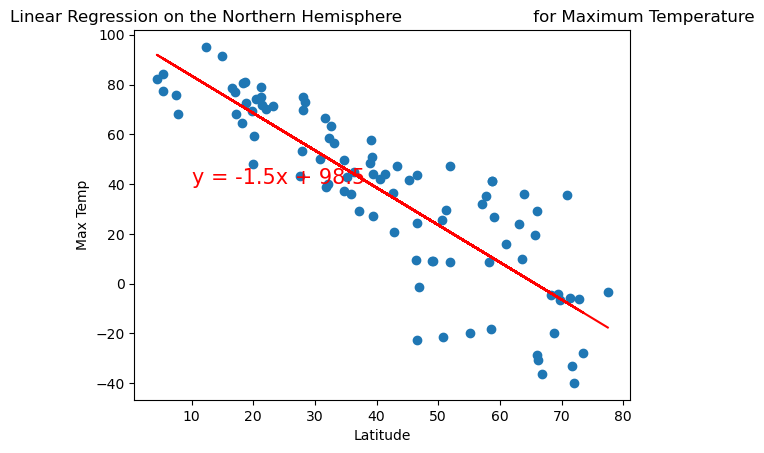

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

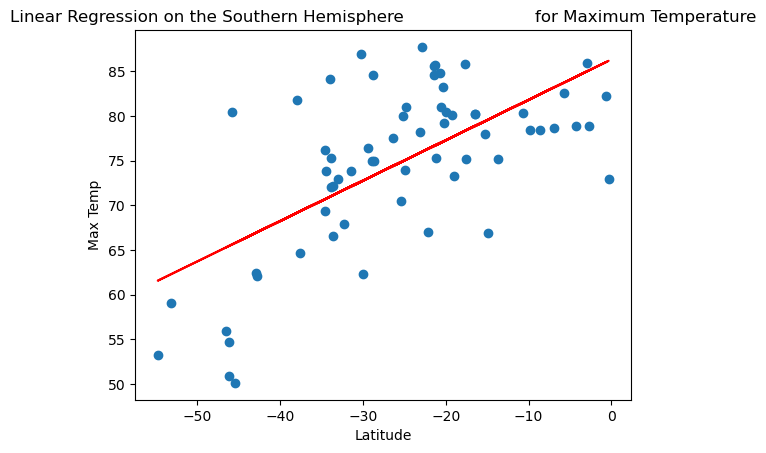

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

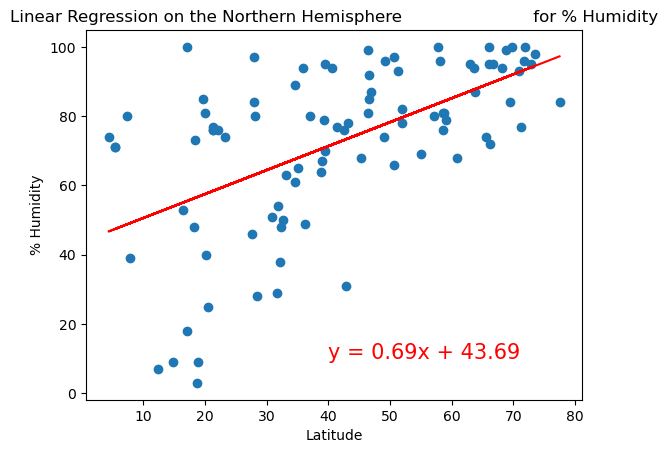

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

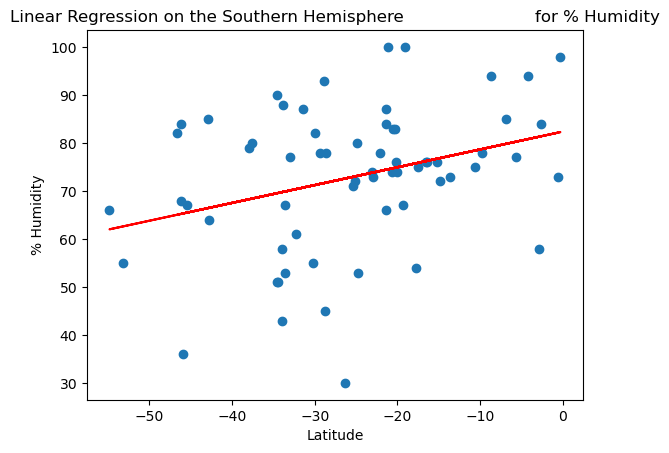

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

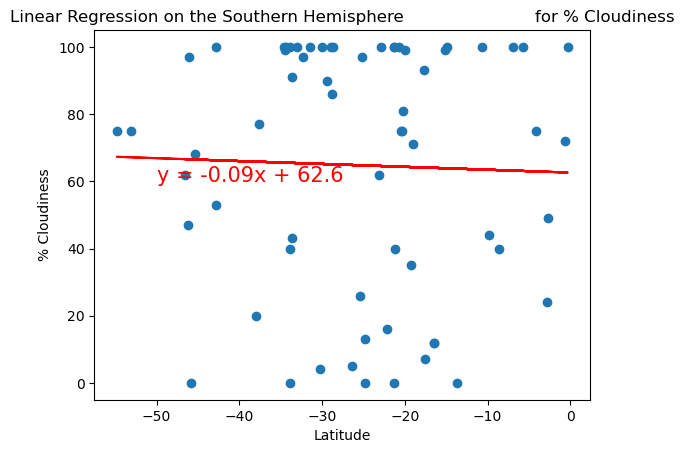

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

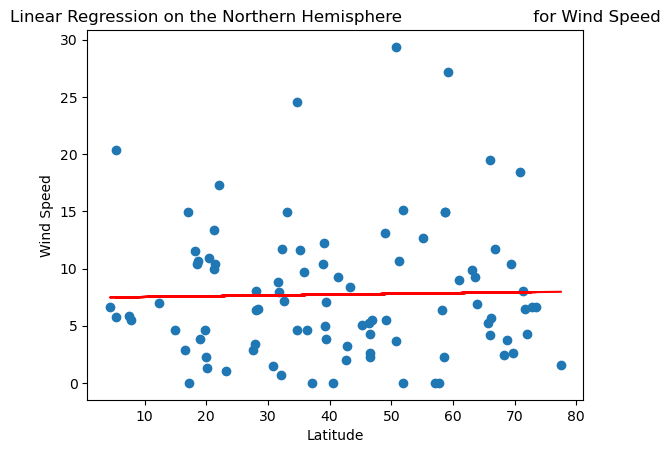

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

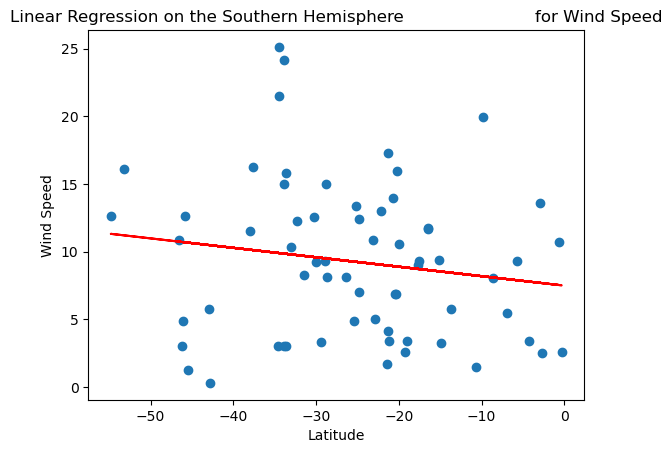

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))